In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
K.clear_session()

train_datagen=ImageDataGenerator(
    rescale=1./255,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

In [2]:
train_generator=train_datagen.flow_from_directory(
    'BrainTumor/Training',
    target_size=(64, 64),
    batch_size=8,
    class_mode='binary'
)

Found 1222 images belonging to 2 classes.


In [3]:
validation_generator=val_datagen.flow_from_directory(
    'BrainTumor/Testing',
    target_size=(64, 64),
    batch_size=8,
    class_mode='binary',
    shuffle=False
)

Found 179 images belonging to 2 classes.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

num_classes = train_generator.num_classes

model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [5]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall
model.compile(
    optimizer=Adam(learning_rate=0.0001),  # hyperparameter
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(), Recall(), 'AUC']
)

In [6]:
#Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15
)

Epoch 1/15
153/153 [==============================] - 17s 92ms/step - loss: 0.5004 - accuracy: 0.7987 - precision: 0.7873 - recall: 0.9625 - auc: 0.8200 - val_loss: 0.5192 - val_accuracy: 0.7598 - val_precision: 0.6703 - val_recall: 0.8243 - val_auc: 0.8503
Epoch 2/15
153/153 [==============================] - 13s 84ms/step - loss: 0.2743 - accuracy: 0.9206 - precision: 0.9148 - recall: 0.9734 - auc: 0.9592 - val_loss: 0.3813 - val_accuracy: 0.8492 - val_precision: 0.7901 - val_recall: 0.8649 - val_auc: 0.9105
Epoch 3/15
153/153 [==============================] - 12s 80ms/step - loss: 0.1903 - accuracy: 0.9411 - precision: 0.9384 - recall: 0.9770 - auc: 0.9814 - val_loss: 0.3346 - val_accuracy: 0.8547 - val_precision: 0.8750 - val_recall: 0.7568 - val_auc: 0.9382
Epoch 4/15
153/153 [==============================] - 13s 87ms/step - loss: 0.1386 - accuracy: 0.9640 - precision: 0.9622 - recall: 0.9855 - auc: 0.9898 - val_loss: 0.3090 - val_accuracy: 0.8883 - val_precision: 0.8140 - val_r

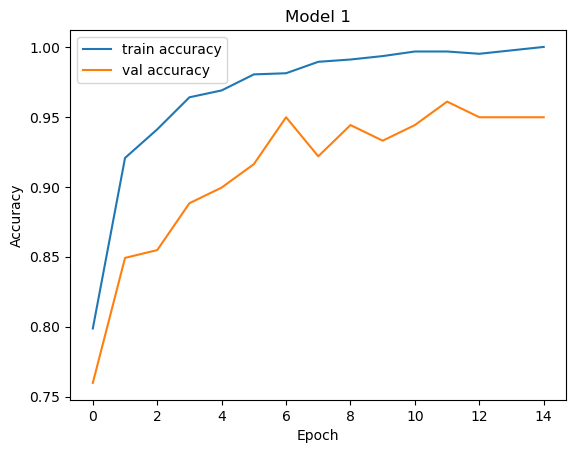

In [11]:
# Plotting Validation Curve
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model 1')
plt.show()

In [14]:
y_prob = model.predict(validation_generator) # Get predicted outputs
y_prob = y_prob.ravel()

23/23 [==============================] - 2s 77ms/step


In [15]:
y_true = validation_generator.classes #Get classes for predicted output

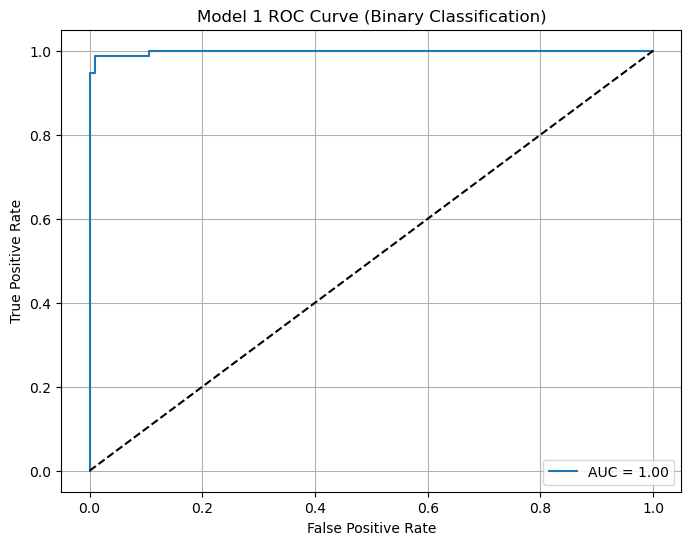

In [16]:
#Plotting AUC Curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model 1 ROC Curve (Binary Classification)')
plt.legend()
plt.grid(True)
plt.show()